### initial setup

#### read the csv file

In [8]:
import pandas as pd
import numpy as np
import json

In [2]:
# read from file
df = pd.read_csv('readings_beacons.csv')

In [3]:
df

,beacon_name,record_time,points
0,SBU-01,2023-03-04 18:46:14.840735+00,"[{""SSID"":""Sinead"",""BSSID"":""203a079ef1a0"",""Chan..."
1,SBU-01,2023-03-04 18:46:15.762992+00,"[{""SSID"":""Sinead"",""BSSID"":""203a079ef1a0"",""Chan..."
2,SBU-10,2023-03-06 20:18:23.218505+00,"[{""SSID"":""AirYorkPLUS"",""BSSID"":""1006ed714cc0"",..."
3,SBU-10,2023-03-06 20:18:36.718874+00,"[{""SSID"":""Dingobot1"",""BSSID"":""7898e84c5e04"",""C..."
4,SBU-10,2023-03-06 20:18:50.228531+00,"[{""SSID"":""AirYorkPLUS"",""BSSID"":""1006ed714cc0"",..."
...,...,...,...
12089,SBU-10,2023-03-20 21:14:50.908128+00,"[{""SSID"":""AirYorkPLUS"",""BSSID"":""1006ed70df40"",..."
12090,SBU-04,2023-03-20 21:14:52.211162+00,"[{""SSID"":""SBU-03"",""BSSID"":""28cdc104be7b"",""Chan..."
12091,SBU-03,2023-03-20 21:14:52.978595+00,"[{""SSID"":""SBU-04"",""BSSID"":""28cdc104be7a"",""Chan..."
12092,SBU-07,2023-03-20 21:14:55.961081+00,"[{""SSID"":""SBU-05"",""BSSID"":""28cdc104be78"",""Chan..."


In [6]:
df = df.loc[df['record_time'] > '2023-03-10']

#### select out relevant wifi point sources and discard unneeded ones

In [9]:
all_sources = {}
multimapped_bssid = 0
multimapped_bssid_list = []

# iterate each point of each record to get all access points sources
for index, row in df.iterrows():
    pts = row['points']
    pts = json.loads(pts)
    for p in pts:
        bssid = p['BSSID']
        ssid = p['SSID']
        
        # the sources are identified by their bssid
        if bssid not in all_sources:
            # add to map if not yet
            all_sources[bssid] = [ssid, 1]
        else:
            # increment count every encounter
            if ssid == all_sources[bssid][0]:
                all_sources[bssid][1] += 1
            else:
                multimapped_bssid += 1
                multimapped_bssid_list.append((bssid, all_sources[bssid], ssid))

In [11]:
all_sources

{'1006ed713b40': ['AirYorkPLUS', 3457],
 '1006ed713b41': ['AirYorkGUEST', 3726],
 '1006ed713b42': ['eduroam', 3726],
 '1006ed713b43': ['WiFi-Info', 3743],
 '28cdc104be73': ['SBU-09', 5700],
 '28cdc104be6c': ['SBU-14', 136],
 '28cdc104be78': ['SBU-05', 5457],
 '1006ed580d21': ['AirYorkGUEST', 6109],
 '1006ed580d22': ['eduroam', 6056],
 '0492268269f8': ['2002', 4009],
 '28cdc104be71': ['SBU-10', 782],
 '1006edc0bb20': ['AirYorkPLUS', 923],
 '1006edc0bb21': ['AirYorkGUEST', 927],
 '1006edc0bb22': ['eduroam', 927],
 '1006edc0bb23': ['WiFi-Info', 941],
 'd8ec5e493748': ['north', 6212],
 'deec5e493748': ['', 5866],
 '1006ed42bfc1': ['AirYorkGUEST', 2967],
 '1006ed7217e0': ['AirYorkPLUS', 466],
 '28cdc104be7d': ['SBU-01', 4894],
 'fc15b4d3d9b5': ['HP-Print-B5-ENVY 4500 series', 3268],
 '1006ed71f1e0': ['AirYorkPLUS', 2690],
 '28cdc104be7b': ['SBU-03', 4012],
 '54b80a10be5e': ['iNCML', 3571],
 'da5de23e31ef': ['DIRECT-ef-HP M277 LaserJet', 2614],
 '1006ed71f1e1': ['AirYorkGUEST', 2928],
 '1006

In [16]:
'SBU-{:02d}'.format(2)

'SBU-02'

In [34]:
active_beacons_numbers = list(range(10)) + [12, 13]
active_beacons = ['SBU-{:02d}'.format(i) for i in active_beacons_numbers]
use_ssids = ['AirYorkGUEST', 'AirYorkPLUS', 'eduroam', 'WiFi-Info', 'north', 'HP-Print-B5-ENVY 4500 series', 'DIRECT-ef-HP M277 LaserJet', 'TPLINK', 'aeropuerto', 'protein', 'DIRECT-AF-HP M506 LaserJet'] + active_beacons

selected_sources = {k:all_sources[k] for k in all_sources if all_sources[k][0] in use_ssids and all_sources[k][1] > 2000}
beacon_sources = {k:all_sources[k] for k in all_sources if all_sources[k][0] in active_beacons and all_sources[k][1] > 2000}

In [35]:
selected_sources

{'1006ed713b40': ['AirYorkPLUS', 3457],
 '1006ed713b41': ['AirYorkGUEST', 3726],
 '1006ed713b42': ['eduroam', 3726],
 '1006ed713b43': ['WiFi-Info', 3743],
 '28cdc104be73': ['SBU-09', 5700],
 '28cdc104be78': ['SBU-05', 5457],
 '1006ed580d21': ['AirYorkGUEST', 6109],
 '1006ed580d22': ['eduroam', 6056],
 'd8ec5e493748': ['north', 6212],
 '1006ed42bfc1': ['AirYorkGUEST', 2967],
 '28cdc104be7d': ['SBU-01', 4894],
 'fc15b4d3d9b5': ['HP-Print-B5-ENVY 4500 series', 3268],
 '1006ed71f1e0': ['AirYorkPLUS', 2690],
 '28cdc104be7b': ['SBU-03', 4012],
 'da5de23e31ef': ['DIRECT-ef-HP M277 LaserJet', 2614],
 '1006ed71f1e1': ['AirYorkGUEST', 2928],
 '1006ed71f1e2': ['eduroam', 2958],
 '1006ed71f1e3': ['WiFi-Info', 2982],
 '28cdc104be75': ['SBU-07', 6536],
 '28cdc104be0f': ['SBU-02', 3786],
 '98fc114f4c72': ['aeropuerto', 5993],
 '1006ed42bfc3': ['WiFi-Info', 2943],
 '1006ed711341': ['AirYorkGUEST', 2061],
 '1006ed711342': ['eduroam', 2078],
 '1006ed711343': ['WiFi-Info', 2103],
 '28cdc104be6d': ['SBU-1

In [36]:
len(selected_sources)

39

In [40]:
selected_bssid_list = list(selected_sources.keys())

### create new DataFrames for running the machine learning

#### version where non existent values are filled with -101

In [43]:
data = []

# iterate each data point to create new dataset
for index, row in df.iterrows():
    pts = row['points']
    pts = json.loads(pts)
    cur_data = [row['beacon_name'], ]
    
    # the aps present in this datapoint
    # select only the relevant ones
    cur_sources_present = {}
    for p in pts:
        bssid = p['BSSID']
        ssid = p['SSID']
        if bssid in selected_bssid_list:
            cur_sources_present[bssid] = p['RSSI']
    
    # for creating each column in the new df
    for selected_beacon in selected_bssid_list:
        cur_data.append(cur_sources_present.get(selected_beacon, -101))
    
    data.append(cur_data)

# Create the pandas DataFrame
df_tabified = pd.DataFrame(data, columns=['beacon_name'] + selected_bssid_list)

In [44]:
df_tabified

,beacon_name,1006ed713b40,1006ed713b41,1006ed713b42,1006ed713b43,28cdc104be73,28cdc104be78,1006ed580d21,1006ed580d22,d8ec5e493748,...,1006ed714cc3,28cdc104be74,1006ed580d20,1006ed580d23,28cdc104be6f,001cdf229c99,1006ed42bfc0,28cdc104be7a,1006ed42bfc2,28cdc104be77
0,SBU-13,-57,-57,-57,-57,-68,-84,-83,-83,-101,...,-101,-101,-101,-101,-101,-101,-101,-101,-101,-101
1,SBU-04,-101,-101,-101,-101,-101,-80,-101,-101,-69,...,-101,-101,-101,-101,-101,-101,-101,-101,-101,-101
2,SBU-10,-78,-77,-77,-78,-101,-101,-101,-101,-101,...,-80,-101,-101,-101,-101,-101,-101,-101,-101,-101
3,SBU-06,-101,-101,-101,-101,-101,-101,-56,-56,-101,...,-61,-73,-56,-57,-93,-101,-101,-101,-101,-101
4,SBU-02,-101,-101,-101,-101,-101,-94,-101,-101,-64,...,-101,-101,-101,-101,-101,-69,-66,-91,-101,-101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12069,SBU-10,-101,-80,-78,-80,-83,-101,-101,-101,-101,...,-101,-101,-101,-101,-101,-101,-101,-101,-101,-101
12070,SBU-04,-101,-101,-101,-101,-101,-84,-75,-74,-73,...,-101,-101,-75,-75,-92,-101,-78,-101,-77,-101
12071,SBU-03,-101,-101,-101,-101,-101,-82,-66,-66,-76,...,-101,-101,-71,-68,-89,-101,-101,-69,-101,-94
12072,SBU-07,-101,-101,-101,-101,-89,-73,-65,-65,-71,...,-101,-101,-65,-65,-92,-80,-82,-92,-82,-92


#### version where non existent values are put as NaN

In [68]:
data = []

# iterate each data point to create new dataset
for index, row in df.iterrows():
    pts = row['points']
    pts = json.loads(pts)
    cur_data = [row['beacon_name'], ]
    
    # the aps present in this datapoint
    # select only the relevant ones
    cur_sources_present = {}
    for p in pts:
        bssid = p['BSSID']
        ssid = p['SSID']
        if bssid in selected_bssid_list:
            cur_sources_present[bssid] = p['RSSI']
    
    # for creating each column in the new df
    for selected_beacon in selected_bssid_list:
        cur_data.append(cur_sources_present.get(selected_beacon, float('NaN')))
    
    data.append(cur_data)

# Create the pandas DataFrame
df_tabified_withnan = pd.DataFrame(data, columns=['beacon_name'] + selected_bssid_list)

In [69]:
df_tabified_withnan

,beacon_name,1006ed713b40,1006ed713b41,1006ed713b42,1006ed713b43,28cdc104be73,28cdc104be78,1006ed580d21,1006ed580d22,d8ec5e493748,...,1006ed714cc3,28cdc104be74,1006ed580d20,1006ed580d23,28cdc104be6f,001cdf229c99,1006ed42bfc0,28cdc104be7a,1006ed42bfc2,28cdc104be77
0,SBU-13,-57.0,-57.0,-57.0,-57.0,-68.0,-84.0,-83.0,-83.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SBU-04,NaN,NaN,NaN,NaN,NaN,-80.0,NaN,NaN,-69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SBU-10,-78.0,-77.0,-77.0,-78.0,NaN,NaN,NaN,NaN,NaN,...,-80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SBU-06,NaN,NaN,NaN,NaN,NaN,NaN,-56.0,-56.0,NaN,...,-61.0,-73.0,-56.0,-57.0,-93.0,NaN,NaN,NaN,NaN,NaN
4,SBU-02,NaN,NaN,NaN,NaN,NaN,-94.0,NaN,NaN,-64.0,...,NaN,NaN,NaN,NaN,NaN,-69.0,-66.0,-91.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12069,SBU-10,NaN,-80.0,-78.0,-80.0,-83.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12070,SBU-04,NaN,NaN,NaN,NaN,NaN,-84.0,-75.0,-74.0,-73.0,...,NaN,NaN,-75.0,-75.0,-92.0,NaN,-78.0,NaN,-77.0,NaN
12071,SBU-03,NaN,NaN,NaN,NaN,NaN,-82.0,-66.0,-66.0,-76.0,...,NaN,NaN,-71.0,-68.0,-89.0,NaN,NaN,-69.0,NaN,-94.0
12072,SBU-07,NaN,NaN,NaN,NaN,-89.0,-73.0,-65.0,-65.0,-71.0,...,NaN,NaN,-65.0,-65.0,-92.0,-80.0,-82.0,-92.0,-82.0,-92.0


### visualize using covariance matrix

In [47]:
df_seperated = df_tabified.loc[df_tabified['beacon_name'] == 'SBU-05']
df_seperated

,beacon_name,1006ed713b40,1006ed713b41,1006ed713b42,1006ed713b43,28cdc104be73,28cdc104be78,1006ed580d21,1006ed580d22,d8ec5e493748,...,1006ed714cc3,28cdc104be74,1006ed580d20,1006ed580d23,28cdc104be6f,001cdf229c99,1006ed42bfc0,28cdc104be7a,1006ed42bfc2,28cdc104be77
82,SBU-05,-75,-75,-75,-75,-81,-101,-75,-73,-82,...,-101,-101,-75,-72,-101,-87,-101,-77,-82,-101
241,SBU-05,-77,-75,-75,-76,-86,-101,-75,-77,-89,...,-101,-101,-76,-77,-101,-101,-101,-81,-101,-101
253,SBU-05,-75,-74,-74,-74,-80,-101,-76,-73,-87,...,-101,-101,-75,-73,-101,-101,-101,-78,-101,-101
263,SBU-05,-101,-75,-76,-73,-85,-101,-75,-73,-84,...,-101,-101,-73,-71,-101,-101,-101,-80,-101,-101
271,SBU-05,-75,-101,-101,-75,-81,-101,-72,-72,-82,...,-101,-101,-74,-71,-101,-101,-101,-79,-101,-101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12023,SBU-05,-77,-75,-75,-76,-78,-101,-63,-64,-73,...,-101,-101,-65,-63,-101,-101,-78,-84,-77,-101
12034,SBU-05,-76,-75,-75,-75,-101,-101,-64,-62,-76,...,-101,-101,-64,-63,-101,-101,-77,-87,-77,-101
12046,SBU-05,-76,-75,-75,-101,-101,-101,-64,-63,-76,...,-101,-101,-64,-64,-101,-101,-78,-87,-78,-101
12056,SBU-05,-75,-73,-75,-75,-101,-101,-64,-63,-76,...,-101,-101,-66,-66,-101,-101,-101,-87,-101,-101


In [50]:
df_sbu_05_np = df_seperated[selected_bssid_list].to_numpy()

In [52]:
df_sbu_05_np.shape

(1021, 39)

In [56]:
# remember bias = True in covariance!
# otherwise the function divides by N-1 instead of N
cov = np.cov(df_sbu_05_np.T, bias=True)

In [59]:
cov

array([[ 2.17287238e+02,  1.43703749e+02,  1.32121734e+02, ...,
        -4.63164851e+01,  7.18684146e+01,  3.67056745e-01],
       [ 1.43703749e+02,  2.12626437e+02,  1.45333127e+02, ...,
        -4.16813892e+01,  5.99991769e+01,  3.38944842e-01],
       [ 1.32121734e+02,  1.45333127e+02,  2.10111461e+02, ...,
        -4.14917919e+01,  5.62058668e+01,  3.30502158e-01],
       ...,
       [-4.63164851e+01, -4.16813892e+01, -4.14917919e+01, ...,
         3.65360956e+01, -2.97009087e+01, -1.14865014e-01],
       [ 7.18684146e+01,  5.99991769e+01,  5.62058668e+01, ...,
        -2.97009087e+01,  1.21565516e+02,  2.03848467e-01],
       [ 3.67056745e-01,  3.38944842e-01,  3.30502158e-01, ...,
        -1.14865014e-01,  2.03848467e-01,  8.78380647e-02]])

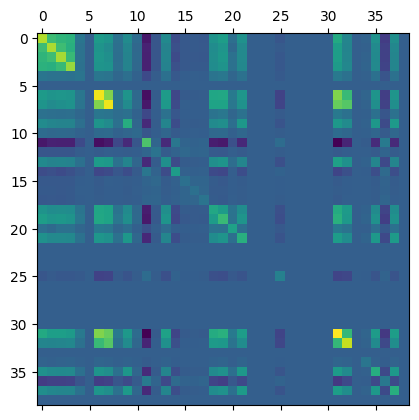

In [58]:
import matplotlib.pyplot as plt

plt.matshow(cov)
plt.show()

### K Nearest Neighbors from scikit learn

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [92]:
X = df_tabified[selected_bssid_list].to_numpy()
y = df_tabified['beacon_name'].to_numpy()

In [93]:
k = 5
skf = sklearn.model_selection.StratifiedKFold(n_splits=k, random_state=None, shuffle=True)
models = []

#split dataset into train and test data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [94]:
acc_score = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train , X_test = X[train_index,:], X[test_index,:]
    y_train , y_test = y[train_index], y[test_index]
    
    model = KNeighborsClassifier(n_neighbors=5)
    
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    
    acc = sklearn.metrics.accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    models.append(model)

avg_acc_score = sum(acc_score)/k

In [95]:
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.9991718426501035, 0.998343685300207, 0.9987577639751553, 0.9966873706004141, 0.9983429991714996]
Avg accuracy : 0.9982607323394758


In [97]:
item_cts = []
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    item_cts.append(test_index.shape)

wrong_per_fold = [item_cts[i][0] * (1 - acc_score[i]) for i in range(k)]
    
# number of of item that the algo gets wrong
print(wrong_per_fold)
print(sum(wrong_per_fold))

[2.0000000000000395, 4.000000000000079, 3.0000000000000595, 7.99999999999989, 3.999999999999963]
21.000000000000032


### HistGradientBoostingClassifier from scikit learn

In [75]:
import sklearn
import sklearn.ensemble

In [73]:
X = df_tabified_withnan[selected_bssid_list].to_numpy()
y = df_tabified_withnan['beacon_name'].to_numpy()

In [76]:
k = 5
skf = sklearn.model_selection.StratifiedKFold(n_splits=k, random_state=None, shuffle=True)
model = sklearn.ensemble.HistGradientBoostingClassifier()

In [77]:
skf.get_n_splits(X, y)

5

In [79]:
acc_score = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train , X_test = X[train_index,:], X[test_index,:]
    y_train , y_test = y[train_index], y[test_index]
    
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    
    acc = sklearn.metrics.accuracy_score(pred_values , y_test)
    acc_score.append(acc)

avg_acc_score = sum(acc_score)/k

In [80]:
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.9995859213250518, 0.998343685300207, 0.9995859213250518, 0.9995859213250518, 0.9995857497928748]
Avg accuracy : 0.9993374398136474


In [84]:
y.shape[0] * (1 - avg_acc_score)

7.999751690021036

In [85]:
item_cts = []
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    item_cts.append(test_index.shape)

wrong_per_fold = [item_cts[i][0] * (1 - acc_score[i]) for i in range(k)]
    
# number of of item that the algo gets wrong
print(wrong_per_fold)
print(sum(wrong_per_fold))